In [1]:
#!/usr/bin/python

import numpy as np
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mp
import datetime
import os
#import seaborn as sns
#sns.set()
import warnings
warnings.filterwarnings('ignore')


import sys
sys.path.append('/home2/datahome/cdemarez/MODULES_PY') 

from tools import *

from croco_tools_cdm import *
from plot_tools import *
from matplotlib.colors import LogNorm

import matplotlib.patches as patches

In [2]:
#path a changer pour differents run


#leewa
path1 = '/home2/datawork/cdemarez/Needs/V1'
path2='/home/datawork-lops-oh/meddle/cdemarez/STAGE_M2/final_v2'
#load parameters of the simulation
h,lon,lat,mask,f,time_ini,pm,pn,angle=load_param_simulation(path1)


#smoothed
path1_s = '/home/datawork-lops-oh/meddle/cdemarez/STAGE_M2/LEEWA_smoothed/INIT/grd_partit'
path2_s = '/home/datawork-lops-oh/meddle/cdemarez/STAGE_M2/LEEWA_smoothed/final'
h_s,lon_s,lat_s,mask_s,f_s,time_ini_s,pm_s,pn_s,angle_s=load_param_simulation(path1_s)


def put_uv(field):
    
    if len(field.shape)==2:
        return 0.25*(field[1:,1:]+field[:-1,:-1]+field[:-1,1:]+field[1:,:-1])

    if len(field.shape)==3:
        return 0.25*(field[:,1:,1:]+field[:,:-1,:-1]+field[:,:-1,1:]+field[:,1:,:-1])
    
lon_uv=put_uv(lon)
lat_uv=put_uv(lat)
h_uv=put_uv(h)
pm_uv=put_uv(pm)
pn_uv=put_uv(pn)


('date du fichier ini:', datetime.date(2016, 3, 20))
('date du fichier ini:', datetime.date(2016, 3, 20))


In [3]:
pathsave_current='./compare_current/'
try:
    os.mkdir(pathsave_current)
except:
    pass

In [4]:
#choose a zone :
#corners=[-79.5,30.8,-77.7,32.18]
corners=[np.min(lon),np.min(lat),np.max(lon),np.max(lat)]

## Load leewa

In [5]:
#subsambple the velocity to save memory
nx=5
ny=5


nsave=24 #take every ___ hours
ind_file_ini=0
step_tot=0

N_files=15#24
###attention le 1er pas du 17ieme fichier est pas bon (408)

N_steps=24

In [7]:
# Start the loop

U_all=[]
KE_all=[]
time_all=[]

for i in range (N_files):   
    
    ind_file=i*N_steps+ind_file_ini
    if ind_file<10:
        file='/leewa_avg.0000{}.nc'.format(ind_file)
    elif ind_file<100:
        file='/leewa_avg.000{}.nc'.format(ind_file)
    else :
        file='/leewa_avg.00{}.nc'.format(ind_file)
        
    print('loading file ',file)

    for j in range(0,N_steps,nsave):
        
        print('h ',j)
        
        
        #####LOAD FIELDS from AVG
        step_tot=step_tot+1
        time_step=ind_file+j
        ncfile=path2+file
        nc = Dataset(ncfile)
        zeta= nc.variables['zeta'][j,:,:]

        u= nc.variables['u'][j,:,:,:]
        v= nc.variables['v'][j,:,:,:]
        w= nc.variables['w'][j,:,:,:]
        rho= nc.variables['rho'][j,:,:,:]
        
        u=0.5*(u[:,1:,:]+u[:,:-1,:])
        v=0.5*(v[:,:,1:]+v[:,:,:-1])
        w=put_uv(w)
        rho=put_uv(rho)
        
        U=np.sqrt(u**2+v**2)
        KE=0.5*rho*(u**2+v**2+w**2)

        hc=getattr(nc,'hc')
        Cs_r=getattr(nc,'Cs_r')
        Cs_w=getattr(nc,'Cs_w')
        g=9.81
        s_rho=u.shape[0]
        time= int(nc.variables['scrum_time'][0])-time_ini
        nc.close()
        if i==0 and j==0:z_r,z_w=zlevs(h,zeta[:,:], hc, Cs_r, Cs_w)
        
        KE_all.append(KE[:,::nx,::ny])
        U_all.append(U[:,::nx,::ny])
        time_all.append(time)
        
        del u,v,w,rho

        

U_all=np.array(U_all)
KE_all=np.array(KE_all)
time_all=np.array(time_all) 

print('Done')
        

('loading file ', '/leewa_avg.00000.nc')
('h ', 0)
('loading file ', '/leewa_avg.00024.nc')
('h ', 0)
('loading file ', '/leewa_avg.00048.nc')
('h ', 0)
('loading file ', '/leewa_avg.00072.nc')
('h ', 0)
('loading file ', '/leewa_avg.00096.nc')
('h ', 0)
('loading file ', '/leewa_avg.00120.nc')
('h ', 0)
('loading file ', '/leewa_avg.00144.nc')
('h ', 0)
('loading file ', '/leewa_avg.00168.nc')
('h ', 0)
('loading file ', '/leewa_avg.00192.nc')
('h ', 0)
('loading file ', '/leewa_avg.00216.nc')
('h ', 0)
('loading file ', '/leewa_avg.00240.nc')
('h ', 0)
('loading file ', '/leewa_avg.00264.nc')
('h ', 0)
('loading file ', '/leewa_avg.00288.nc')
('h ', 0)
('loading file ', '/leewa_avg.00312.nc')
('h ', 0)
('loading file ', '/leewa_avg.00336.nc')
('h ', 0)
Done


## Load smoothed

In [8]:
# Start the loop

U_all_s=[]
KE_all_s=[]
time_all_s=[]

for i in range (N_files):   
    
    ind_file=i*N_steps+ind_file_ini
    if ind_file<10:
        file='/leewa_avg.0000{}.nc'.format(ind_file)
    elif ind_file<100:
        file='/leewa_avg.000{}.nc'.format(ind_file)
    else :
        file='/leewa_avg.00{}.nc'.format(ind_file)
        
    print('loading file ',file)

    for j in range(0,N_steps,nsave):
        
        print('h ',j)
        
        
        #####LOAD FIELDS from AVG
        step_tot=step_tot+1
        time_step=ind_file+j
        ncfile=path2_s+file
        nc = Dataset(ncfile)


        u= nc.variables['u'][j,:,:,:]
        v= nc.variables['v'][j,:,:,:]
        w= nc.variables['w'][j,:,:,:]
        rho= nc.variables['rho'][j,:,:,:]
        
        u=0.5*(u[:,1:,:]+u[:,:-1,:])
        v=0.5*(v[:,:,1:]+v[:,:,:-1])
        w=put_uv(w)
        rho=put_uv(rho)
        
        U=np.sqrt(u**2+v**2)
        KE=0.5*rho*(u**2+v**2+w**2)
        
    
        time= int(nc.variables['scrum_time'][0])-time_ini_s
        nc.close()

        


        KE_all_s.append(KE[:,::nx,::ny])
        U_all_s.append(U[:,::nx,::ny])
        time_all_s.append(time)
        
        #del u,v,w,rho

        
U_all_s=np.array(U_all_s)
KE_all_s=np.array(KE_all_s)


time_all_s=np.array(time_all_s)   

print('Done')
        

('loading file ', '/leewa_avg.00000.nc')
('h ', 0)
('loading file ', '/leewa_avg.00024.nc')
('h ', 0)
('loading file ', '/leewa_avg.00048.nc')
('h ', 0)
('loading file ', '/leewa_avg.00072.nc')
('h ', 0)
('loading file ', '/leewa_avg.00096.nc')
('h ', 0)
('loading file ', '/leewa_avg.00120.nc')
('h ', 0)
('loading file ', '/leewa_avg.00144.nc')
('h ', 0)
('loading file ', '/leewa_avg.00168.nc')
('h ', 0)
('loading file ', '/leewa_avg.00192.nc')
('h ', 0)
('loading file ', '/leewa_avg.00216.nc')
('h ', 0)
('loading file ', '/leewa_avg.00240.nc')
('h ', 0)
('loading file ', '/leewa_avg.00264.nc')
('h ', 0)
('loading file ', '/leewa_avg.00288.nc')
('h ', 0)
('loading file ', '/leewa_avg.00312.nc')
('h ', 0)
('loading file ', '/leewa_avg.00336.nc')
('h ', 0)
Done


### create necessary quantities

In [9]:
zr_uv=put_uv(z_r)[:,::ny,::nx]
dz=np.gradient(zr_uv,axis=0)
H=np.nansum(dz,axis=0)

lons=lon_uv[::ny,::nx]
lats=lat_uv[::ny,::nx]

pms=pm_uv[::ny,::nx]
pns=pn_uv[::ny,::nx]

In [11]:
nzup=-1


U_meanZ=(1./H)*np.nansum((U_all[:,:nzup]*dz[:nzup]),axis=1)
U_meanZ_meanT=np.nanmean(U_meanZ,axis=0)

U_meanZ_s=(1./H)*np.nansum((U_all_s[:,:nzup]*dz[:nzup]),axis=1)
U_meanZ_meanT_s=np.nanmean(U_meanZ_s,axis=0)

# Simple plot compare horizontal

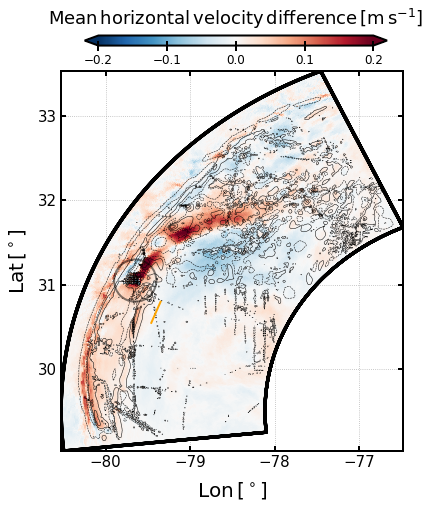

In [21]:

#plot the edge of leewa 
edge=3
border=np.copy(mask)
border[edge:-edge,edge:-edge]=np.nan



fig=plt.figure(figsize=(7,7))
ax=plt.subplot(111,aspect='equal',fc='w')
        

#conts_diff=np.linspace(-100,100,16)
conts_diff=[-100,-50,-10,10,50,100]
plt.contour(lon,lat,(h-h_s),conts_diff,linewidths=0.5,colors='k',zorder=3,alpha=1,rasterized=True)

pc1=plt.pcolormesh(lons,lats,U_meanZ_meanT_s-U_meanZ_meanT,
                   vmin=-0.2,vmax=0.2,cmap='RdBu_r',alpha=1,zorder=2,rasterized=True)


plt.xlabel(r'${\rm Lon\, [^\circ]}$',fontsize=20,labelpad=10)
plt.ylabel(r'${\rm Lat\, [^\circ]}$',fontsize=20,labelpad=10,rotation=90)
plt.xticks(np.arange(-81,75,1))  
plt.scatter(lon,lat,c=border,cmap='binary_r',s=4,zorder=5,rasterized=True)
plt.axis([corners[0],corners[2],corners[1],corners[3]])

plt.grid(ls=':')


lonsec1=[-79.46,-79.35]
latsec1=[30.55,30.8]
plt.plot(lonsec1,latsec1,'-',color='orange',linewidth=2,zorder=50)


circle = plt.Circle((-79.65, 31.05), 0.25,zorder=10,
                    fc='None',color='k',ls='-',alpha=0.5,linewidth=2)
ax.add_artist(circle)

        
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)  

plt.grid(ls=':')

ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(direction='in',width=2,length=5,bottom=1,top=1,left=1,right=1) 





cbar_ax = fig.add_axes([0.22, 0.93, 0.6, 0.02])
cbar=fig.colorbar(pc1, cax=cbar_ax,extend='both',orientation='horizontal',ticks=(np.arange(-1,1,0.1)))
#cbar.set_label(r"${\rmDensisty \,[ kg.m^{-3}]}$", fontsize=15, 	rotation=0,labelpad=-55)
cbar.set_label(r"${\rm Mean\, horizontal\,velocity\,difference\,[ m\,s^{-1}]}$", fontsize=18, 	rotation=0,labelpad=-60)
#cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.set_offset_position('left')
cbar.update_ticks()
cbar.outline.set_linewidth(2)
cbar_ax.tick_params(direction='inout',width=2,length=10,labelsize=12)

    




#plt.savefig(pathsave_current+'tmp2.png',dpi=200,bbox_inches='tight')
plt.savefig(pathsave_current+'compare_current_easy.pdf',dpi=200,bbox_inches='tight')

plt.show()